

#**Autolib electric car-sharing service company hypothesis testing project**



**Define Data Analytic Question**



1.Is the mean of Blue Cars returned equal to the mean of Utilib Cars taken?

Our hypothesis;

Null Hypothesis:The mean of blue cars returned and Utilib Cars taken is the same.

Ho : μ1 = μ2

Alternate Hypothesis: The mean of blue cars returned and Utilib Cars taken is not the same.

Ha : μ1 ≠ μ2


#**Metric for Success**

This project will be considered a success when we are able to perform the following tasks:

1.Specify the null and alternate hypothesis.

2.Conduct EDA to uncover underlying patterns within the dataset that can guide 
the sampling technique.

3.Perform hypothesis testing and interpret the results.

4.Provide project summary and conclusions.

#**Understanding the Research Context**

Autolib was an electric car sharing service company in France that was operational between 2011 and 2018. The company had three types of electric cars i.e blue cars, Utilib cars and Utilib 1.4 cars. Blue cars were most popularly used. These cars were available across various cities and postal codes in France and renters could pick up cars in one station then drop them off at a different station that was closer to their destination. The dataset used in this analysis allows us to understand various elecric car usage patterns for the company. The available data contains usage information for various postal codes between January 2018 and June 2018.

#**Data Relevance**
The dataset used in the analysis contains records of electric car usage in France from January 2018 to June 2018. This dataset was originally sourced from opendataparis.com. Some of the information in the dataset includes postal code, day of the week and total cars returned or picked up for blue cars, Utilib cars and Utilib 1.4 cars.The data available for this analysis is valid and useful towards achieving the project goal given the availability of both numeric and categorical attributes.

For this analysis, we will be using the following libraries:


*   pandas for managing the data.
*   numpy for mathematical operations.
*   seaborn for visualizing the data.
*   matplotlib for visualizing the data.
*   sklearn for machine learning and machine-learning-pipeline related functions.
*  scipy for statistical computations.

###Installing Required Libraries

We will be required to install various libraries to conduct our analysis when running the notebook in the current environment.



In [130]:
#importing data science python libraries
import pandas as pd
import numpy as np 
import math

import seaborn as sns 
import matplotlib.pylab as plt
import plotly.express as px
%matplotlib inline
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats
from plotly.subplots import make_subplots

# Reading and understanding our data

The dataset in this Hypothesis Test represents data from Autolib electric car-sharing service company.

3. Checking the Data.

In [131]:
#Load the dataframe
data = pd.read_csv('https://bit.ly/DSCoreAutolibDataset')
#Check first 5 rows of the dataframe
data.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


Let's find out how many entries there are in our dataset, using shape function.



In [132]:
#Check the shape of our data
data.shape

(16085, 13)

The data has 13 columns and 16085 entries.

In [133]:
#Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


The data has 11 integer and 2 object data types.

In [134]:
#Check column labels
data.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

# **Handling Missing Values**

In [135]:
#check for null values in the dataframe
data.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

**Conclusion:** The data has no missing values.

In [136]:
#Get summary statistics table of numerical data using .describe function
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal code,16085.0,88791.293876,7647.342000,75001.0,91330.0,92340.0,93400.0,95880.0
n_daily_data_points,16085.0,1431.330619,33.212050,1174.0,1439.0,1440.0,1440.0,1440.0
dayOfWeek,16085.0,2.969599,2.008378,0.0,1.0,3.0,5.0,6.0
BlueCars_taken_sum,16085.0,125.926951,185.426579,0.0,20.0,46.0,135.0,1352.0
BlueCars_returned_sum,16085.0,125.912714,185.501535,0.0,20.0,46.0,135.0,1332.0
Utilib_taken_sum,16085.0,3.698290,5.815058,0.0,0.0,1.0,4.0,54.0
Utilib_returned_sum,16085.0,3.699099,5.824634,0.0,0.0,1.0,4.0,58.0
Utilib_14_taken_sum,16085.0,8.600560,12.870098,0.0,1.0,3.0,10.0,100.0
Utilib_14_returned_sum,16085.0,8.599192,12.868993,0.0,1.0,3.0,10.0,101.0
Slots_freed_sum,16085.0,22.629033,52.120263,0.0,0.0,0.0,5.0,360.0


Looking for Duplicates.

In [137]:
#Check for duplicates
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16080    False
16081    False
16082    False
16083    False
16084    False
Length: 16085, dtype: bool

There appears to be no duplicates in our dataframe

Checking for outliers

In [138]:
# Let's set the visualization parameters
fig_4 = make_subplots(rows=1, cols=1, specs=[[{'type': 'xy'}]])

# Setting Box parameters
fig_4.add_trace(go.Box(x=data['BlueCars_taken_sum'], 
                       name='BlueCars_taken_sum'))

# Setting the parameters of the Box when displaying
fig_4.update_traces(marker_color='Blue')

# Setting the parameters of the Box when displaying
fig_4.update_layout(showlegend=False, 
                    template='simple_white', 
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))

# Displaying the Box
fig_4.show()

# Let's set the visualization parameters
fig_5 = make_subplots(rows=1, cols=1, specs=[[{'type': 'xy'}]])

# Setting Box parameters
fig_5.add_trace(go.Box(x=data['BlueCars_returned_sum'], 
                       name='BlueCars_returned_sum'))

# Setting the parameters of the Box when displaying
fig_5.update_traces(marker_color='Blue')

# Setting the parameters of the Box when displaying
fig_5.update_layout(showlegend=False, 
                    template='simple_white', 
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))

# Displaying the Box
fig_5.show()

# Let's set the visualization parameters
fig_6 = make_subplots(rows=1, cols=1, specs=[[{'type': 'xy'}]])

# Setting Box parameters
fig_6.add_trace(go.Box(x=data['Slots_taken_sum'], 
                       name='Slots_taken_sum'))

# Setting the parameters of the Box when displaying
fig_6.update_traces(marker_color='Blue')

# Setting the parameters of the Box when displaying
fig_6.update_layout(showlegend=False, 
                    template='simple_white', 
                    font=dict(family='Arial', 
                              size=12, 
                              color='black'))

# Displaying the Box
fig_6.show()

**Conclusion:** There appears to be no duplicates in our dataframe. There are several 'outliers' in the dataset for the number of blue cars taken and returned. However, there is no sufficient evidence that point to the likelihhod of these outliers being erroneous records. Since the outliers could be valid observations, we will not delete them. We included the outliers in our analysis for accuracy.








# Descriptive Analysis 



**Univariate Analysis**

In [139]:
# Describe numerical variables
data[['BlueCars_returned_sum','Utilib_taken_sum']].describe()

,BlueCars_returned_sum,Utilib_taken_sum
count,16085.000000,16085.000000
mean,125.912714,3.698290
std,185.501535,5.815058
min,0.000000,0.000000
25%,20.000000,0.000000
50%,46.000000,1.000000
75%,135.000000,4.000000
max,1332.000000,54.000000


it is cleary seen that the mean,minimum value and maximaum value of bluecars taken sum is 125.92,0.0 and 1352 respectively.Also the mean,minimum and maximum value of utilib taken sum is 3.69 ,0.0 and 54 

In [140]:
# Building a correlation matrix and visualizing variables relationships 
data.corr()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
Postal code,1.000000,0.000432,0.000343,-0.698020,-0.697519,-0.625521,-0.624786,-0.656744,-0.656516,-0.749528,-0.749157
n_daily_data_points,0.000432,1.000000,0.002039,0.029411,0.030063,0.022669,0.023322,0.025738,0.026351,0.020873,0.021169
dayOfWeek,0.000343,0.002039,1.000000,0.079649,0.081954,0.069295,0.071713,0.068790,0.071279,0.049960,0.050468
BlueCars_taken_sum,-0.698020,0.029411,0.079649,1.000000,0.998660,0.893833,0.892850,0.940946,0.940757,0.948575,0.947996
BlueCars_returned_sum,-0.697519,0.030063,0.081954,0.998660,1.000000,0.893613,0.893268,0.940542,0.941117,0.948258,0.948771
Utilib_taken_sum,-0.625521,0.022669,0.069295,0.893833,0.893613,1.000000,0.981982,0.847519,0.846304,0.853760,0.853049
Utilib_returned_sum,-0.624786,0.023322,0.071713,0.892850,0.893268,0.981982,1.000000,0.845645,0.845306,0.852939,0.852936
Utilib_14_taken_sum,-0.656744,0.025738,0.068790,0.940946,0.940542,0.847519,0.845645,1.000000,0.992062,0.899232,0.898719
Utilib_14_returned_sum,-0.656516,0.026351,0.071279,0.940757,0.941117,0.846304,0.845306,0.992062,1.000000,0.899442,0.899777
Slots_freed_sum,-0.749528,0.020873,0.049960,0.948575,0.948258,0.853760,0.852939,0.899232,0.899442,1.000000,0.999221


Correlation of 'Utilib_taken_sum' and ' blue cars taken sum' is strongly positive at 0.893613 from our correlation matrix plotted above.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



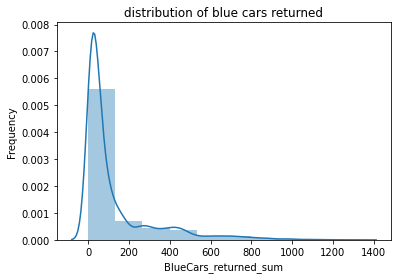

In [141]:
# Plot the BlueCars_taken_sum Histogram
# Plot bluecars taken
sns.distplot(data['BlueCars_returned_sum'], bins=10)
plt.title('distribution of blue cars returned')
plt.xlabel('BlueCars_returned_sum')
plt.ylabel('Frequency');




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



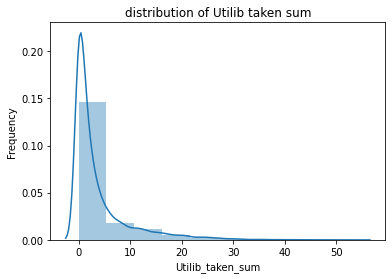

In [142]:
# Plot the Utilib_taken_sum Histogram
# Set the diagram size
sns.distplot(data['Utilib_taken_sum'], bins=10)
plt.title('distribution of Utilib taken sum')
plt.xlabel('Utilib_taken_sum')
plt.ylabel('Frequency');

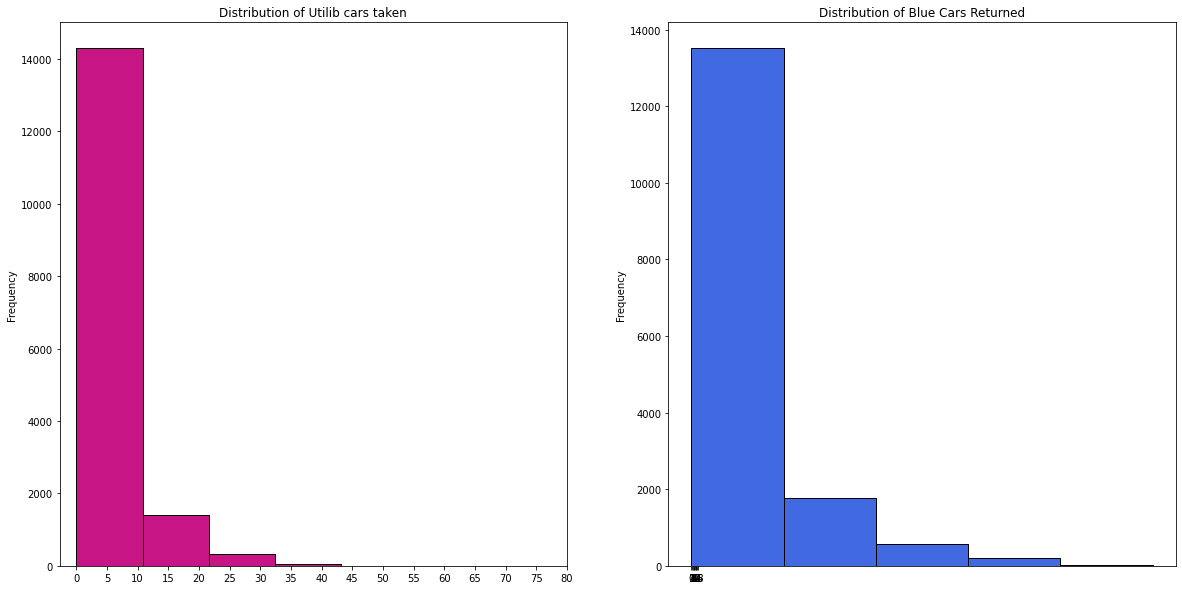

In [143]:
# plotting histograms to show the distribution of blue car returned 

fig,ax=plt.subplots(1,2,figsize=(20,10))
data['Utilib_taken_sum'].plot.hist(ax=ax[0],bins=5,edgecolor='black',color='mediumvioletred')
ax[0].set_title('Distribution of Utilib cars taken')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data['BlueCars_returned_sum'].plot.hist(ax=ax[1],color='royalblue',bins=5,edgecolor='black')
ax[1].set_title('Distribution of Blue Cars Returned')
x2=list(range(0,20,2))
ax[1].set_xticks(x2)
plt.show()

We notice that the two attributes above do not follow a normal distribution. Instead, they are skewed to the right.



**Bivariate analysis**

We plotted correlation graphs of the numerical variables against blue cars returned to check relationships.

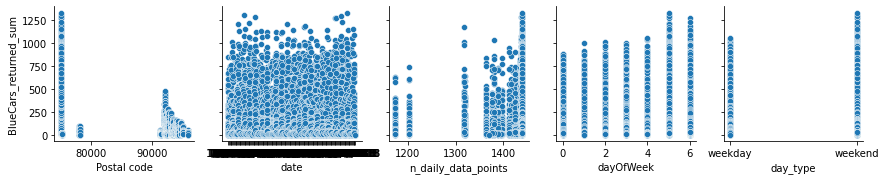

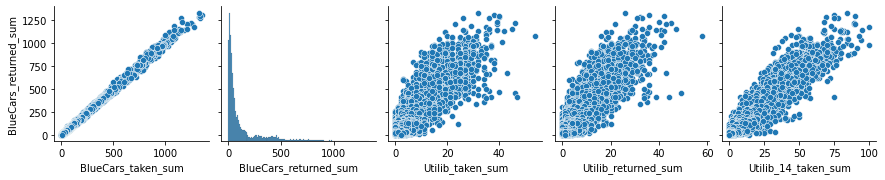

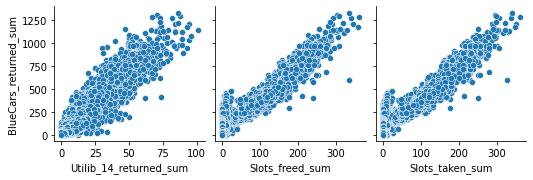

In [144]:
#Establishing the correlation between the target and feature columns to select 
#the relevant features.

for i in range(0, len(data.columns), 5):
    sns.pairplot(data=data,
                x_vars=data.columns[i:i+5],
                y_vars=['BlueCars_returned_sum'])

We can establish that Blue Cars returned sum has a strong correlation with BlueCar_taken sum,Taken,Slots_Freed_sum and Utilib_returned_sum to name but a few.

We plot the hetmap of correlations


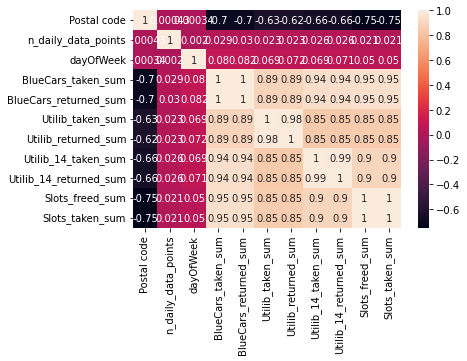

In [145]:
# Plotting the Pearson correlation coefficient among numeric variables


sns.heatmap(data.corr(),annot=True)
plt.show()

The number of blue cars taken and returned have a perfect positive correlation.
Blue cars returned and utilib cars taken correlation is posive.
The correlation with the postal code can be ignored here since the postal code is a qualitative attribute even though it is coded with a numeric data type.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(24.956250000000004, 0.5, 'utilib Cars taken')

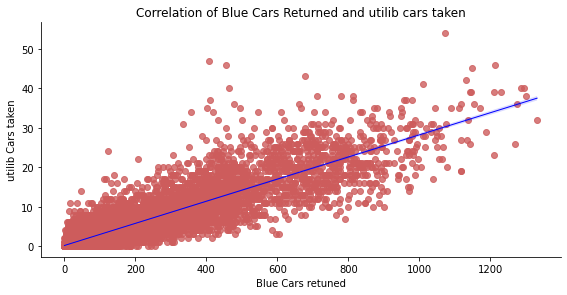

In [146]:
# scatter plot of blue cars returned and utilib cars taken

sns.lmplot('BlueCars_returned_sum', 'Utilib_taken_sum', data, scatter_kws={'marker':'o', 'color': 'indianred'}, 
           line_kws={'linewidth':1,'color':'blue'}, height = 4, aspect = 2)

plt.title("Correlation of Blue Cars Returned and utilib cars taken")
plt.xlabel('Blue Cars retuned')
plt.ylabel("utilib Cars taken")

**TESTING HYPOTHESIS**


Our Hypothesis is as follows;

Null Hypothesis:The mean of blue cars returned and Utilib Cars taken is the same.



> Ho : μ1 = μ2



Alternate Hypothesis: The mean of blue returned cars and Utilib Cars taken is not the same.


> Ha : μ1 ≠ μ2





**Step 1: Look on Distribution of the Data.**

We will be using Shapiro-Wilk Test to determine normality of our data. This is a popular test when determining the distribution of data.

In [147]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
# normality test
stat, p = shapiro(data['BlueCars_returned_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.660, p=0.000
Sample does not look Gaussian (reject H0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning:

p-value may not be accurate for N > 5000.



Sample does not look Gaussian (reject H0).

When plotting the histogram distribution we can see that the graph is right tailed meaning that the data is skewed towards the right hence not normal.

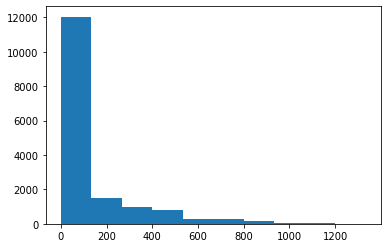

In [148]:
#Plot a histogram of Blue cars returned sum variable
plt.hist(data['BlueCars_returned_sum'])
plt.show()

In [149]:
# normality test
stat, p = shapiro(data['Utilib_taken_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.665, p=0.000
Sample does not look Gaussian (reject H0)


Same applies when plotting the histogram for the Utilib_taken_sum.

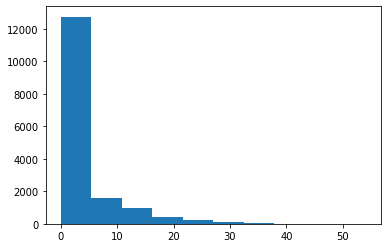

In [150]:
#plotting the histogram for the Utilib_taken_sum variable
plt.hist(data['Utilib_taken_sum'])
plt.show()

Distribution is right tailed hence no normality.

From both the normality calculation and graphs whe can clearly see that our data is not normally distributed.

The next phase of our analysis will be to calculate the difference in our groups given that both distributions are not normal.

We will be using the Mann Whitney U Test since this Test can be used regardless if the data is normaly distributed as compared to the T-test approach.

In [151]:
# Set the alpha level
alpha=0.05

from scipy.stats import mannwhitneyu

# We pass groups to the criterion for testing
stat, pval = mannwhitneyu(data['Utilib_taken_sum'], data['BlueCars_returned_sum'])

print('Statistic:', f'{stat:.3f}')
print('P-Value:', f'{pval:.20f}')
 
# Checking the condition for accepting or rejecting H0
if pval > alpha:
    print('Accept H0 - Mean of Utilib cars taken and Blue Cars returned is equal')
if pval < alpha:
    print('Reject H0 - Mean of Utilib cars taken and Blue Cars returned is not equal')

Statistic: 10149987.000
P-Value: 0.00000000000000000000
Reject H0 - Mean of Utilib cars taken and Blue Cars returned is not equal


We Reject H0 - The mean of Utilib cars taken and Blue Cars returned is not equal.

**Conlusion:** From the both the Mann Whitney and Shapiro Calculation, both tests rejected the Null hypothesis that the mean of Utilib cars taken and Blue Cars returned is equal. Hence we accept the Alternative Hypothesis that the mean of Utilib cars taken and Blue Cars returned is not equal.